In [1]:
import re

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas as pd
from statistics import median, mean

sns.set_style("darkgrid")

import matplotlib.dates as mdates
import numpy as np
import json

In [59]:
classes = pd.read_json("../data/classes.json", orient="records").T
classes.date = classes.date.map(lambda x: x + "T17:30")
classes.date = pd.to_datetime(classes.date, format="%d/%m/%YT%H:%M")
usernames = json.load(open("../data/usernames.json"))
readings = pd.read_csv("../data/readings.csv", index_col="id", parse_dates=['date'])
comments = pd.read_csv("../data/comments.csv", index_col="id", parse_dates=['created', 'updated'])
comments = comments.merge(readings[['url', 'week', 'part', 'date', 'required', 'speaker']], left_on="url_id", right_index=True)

In [60]:
# Combine the last weeks annotations that were spread across several links
merge_urls = list(range(28, 38))

resps = []
for i in merge_urls:
    resps.extend(json.loads(readings.loc[i, "resp"]))
readings.loc[28, 'resp'] = json.dumps(resps)
readings.loc[28, 'total'] = len(resps)
readings.drop(merge_urls[1:], inplace=True)

comments.url_id = comments.url_id.map(lambda x: 28 if x in merge_urls else x)

In [58]:
survey = pd.read_csv("../data/survey.csv")

In [61]:
survey

,Timestamp,What is your Hypothesis username?,I allow the use of survey data and hypothesis username for analysis purposes,How do you prefer to read papers?,Do you annotate (highlight/comment on) papers while working on digital devices?,Do you annotate (highlight/comment on) printed papers?,How do you prefer to annotate readings?,Why do you prefer the previously ticked answer?,Have you used Hypothesis before attending this course?,How would you describe your overall experience of reading and annotating with Hypothesis?,...,"I find annotations helpful, but prefer to read a paper without annotations before viewing comments.",Creating annotations while reading helped me to understand a paper.,Would you want to use Hypothesis for other course readings?,Most engaging part of the course,Why this part?,Most engaging week,Why this week?,Most engaging reading (if there is one that comes to your mind as particularly engaging),Why this reading?,Comments
0,2018/11/26 7:07:17 pm GMT-8,anastasiak,Yes,My iPad (is that an e-reader?),Yes,Yes,"Offline Annotations (PDF reader, locally saved...",I usually have to refer back to the materials ...,No,3,...,4,2,Maybe,Part I: Research and Government,It relates to my area of interest - I signed u...,Week 5b - University-Community Connections (Lu...,Week 1 and 5b are both really close for me. I ...,"Karl Sagan's Reading, ?? ""Detecting Bologne"" ??",It made you think - it also seemed kind of sat...,Good luck with your assignment :)
1,2018/11/26 7:16:03 pm GMT-8,cypriine,Yes,Laptop/PC,Yes,Yes,Online Annotations (Hypothesis),"I did prefer pen and paper, but honestly, the ...",No,5,...,3,5,Yes,Part II: Engaging the Public in the Research P...,What really hit it home in the readings was sh...,Week 12 - The Future of the Public Mission of ...,The information presented about the corporate ...,The reading for Vessuri's paper,This really brought it home that there is so m...,NaN
2,2018/11/26 8:05:28 pm GMT-8,carina.albrecht,Yes,Laptop/PC,Yes,Yes,"Offline Annotations (PDF reader, locally saved...",I do not always want my thoughts to be shared.,No,5,...,5,5,Yes,Part II: Engaging the Public in the Research P...,It is where I found the more concrete examples...,Week 5b - University-Community Connections (Lu...,The lecture was really interesting and I think...,The Public Impact of Latin America’s Approach ...,Because it started a weeks-long email conversa...,NaN
3,2018/11/26 10:35:19 pm GMT-8,michelle_la,Yes,E-readers,Yes,Yes,"Offline Annotations (PDF reader, locally saved...",My preferred method is having my readings save...,No,4,...,3,4,Maybe,Part III: Research in the Public Sphere,I felt this was a part of the course that was ...,Week 12 - The Future of the Public Mission of ...,Made me optimistic and fired up about the futu...,"Decolonization of knowledge, epistemicide, par...",The article provided a new word in my lexicon ...,Drinks after?
4,2018/11/27 12:28:54 am GMT-8,CSG,Yes,Laptop/PC,Yes,Yes,"Offline Annotations (PDF reader, locally saved...",Mendeley is a tool for organizing scientific p...,No,3,...,2,3,Yes,Part III: Research in the Public Sphere,Hebe Vessuri,Week 10 - Global Participation in Knowledge Pr...,"Again… (Ok, I'll throw you a bone—Hebe Vessuri)",The university that became an integral part of...,because the university became an integral part...,NaN
5,2018/11/27 12:34:37 pm GMT-8,aliceLF,Yes,Laptop/PC,Yes,Yes,"Offline Annotations (PDF reader, locally saved...",I get distracted when I read online and end up...,Yes,5,...,2,4,Yes,Introduction,"Jevin's talk was so good! Plus, we weren't fat...",Week 3 - Value of Research in Public Policy (N...,"I really liked the readings, and Nancy was a g...","Maybe ""On Bullshit""?",It was funny. But also made me think.,NaN
6,2018/11/27 12:52:25 pm GMT-8,vreichsh,Yes,Laptop/PC,Yes,Yes,"Offline Annotations (PDF reader, locally saved...",If I want to read and annotate something witho...,No,4,...,2,4,Yes,Part II: Engaging the Public in the Research P...,I found our di

In [47]:
URL_PATTERN = "((http|ftp|https):\/\/[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?)"

our_comments = comments[comments.user.isin(usernames)]

In [48]:
def rand_jitter(arr):
    return arr + np.random.randn(len(arr)) * .05

In [126]:
weeks = readings[readings.required].reset_index().groupby("week")['id'].apply(set)

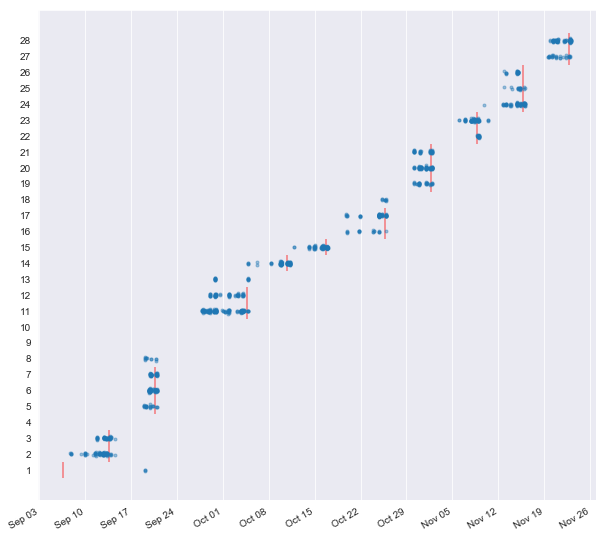

In [129]:
pdf = our_comments[our_comments.in_class == True]
fig, ax = plt.subplots(figsize=(10,10))

# sns.pointplot(x="created", y="url_id", hue="in_class", data=pdf, ci=None, join=False, ax=ax, marker=".")
ax.plot(pdf.created, rand_jitter(pdf.url_id), marker=".", ls='', alpha=.4)

ax.yaxis.set_ticks(range(1,29))
start, end = ax.get_ylim()

for w, urls in weeks.items():
    wmin = min(urls)
    wmax = max(urls)
    date = classes.loc[w, 'date']
    ax.vlines(date, wmin-.5, wmax+.5, colors="r", alpha=.5)
    
mondays = mdates.WeekdayLocator(mdates.MONDAY)
ax.xaxis.set_major_locator(mondays)

weekFormatter = mdates.DateFormatter('%b %d')
ax.xaxis.set_major_formatter(weekFormatter)

#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m'))
fig.autofmt_xdate()

ax.yaxis.grid(False)

In [81]:
x = our_comments.groupby(["user", "part"])['text'].count().reset_index()
x.groupby("user").apply(lambda x: x.loc[x['text'].idxmax()])[['part', 'text']]

,part,text
user,,
Bubblbu,3,40
CSG,2,32
KariGustafson,2,47
aliceLF,2,51
anastasiak,2,114
camilleweinsheimer,3,23
carina.albrecht,2,33
cypriine,3,47
juan,2,13


In [82]:
x = our_comments.groupby(["user", "week"])['text'].count().reset_index()
x.groupby("user").apply(lambda x: x.loc[x['text'].idxmax()])[['week', 'text']]

,week,text
user,,
Bubblbu,11,15
CSG,5,21
KariGustafson,5,26
aliceLF,5,21
anastasiak,5,47
camilleweinsheimer,2,10
carina.albrecht,5,18
cypriine,6,16
juan,5,9


In [86]:
our_comments.groupby("part").count()

,url_id,user,text,created,updated,references,in_class,url,week,date,required,speaker,contains_url
part,,,,,,,,,,,,,
0,144,144,144,144,144,47,144,144,144,144,144,144,144
1,149,149,148,149,149,31,149,149,149,149,149,149,148
2,516,516,516,516,516,155,516,516,516,516,516,516,516
3,477,477,477,477,477,132,477,477,477,477,477,477,477


In [85]:
our_comments.groupby("week").count()

,url_id,user,text,created,updated,references,in_class,url,part,date,required,speaker,contains_url
week,,,,,,,,,,,,,
1,3,3,3,3,3,0,3,3,3,3,3,3,3
2,141,141,141,141,141,47,141,141,141,141,141,141,141
3,149,149,148,149,149,31,149,149,149,149,149,149,148
5,241,241,241,241,241,87,241,241,241,241,241,241,241
6,103,103,103,103,103,14,103,103,103,103,103,103,103
7,83,83,83,83,83,39,83,83,83,83,83,83,83
8,89,89,89,89,89,15,89,89,89,89,89,89,89
9,144,144,144,144,144,49,144,144,144,144,144,144,144
10,93,93,93,93,93,23,93,93,93,93,93,93,93


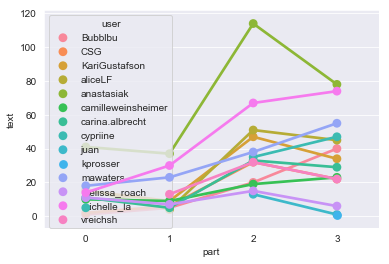

In [77]:
pdf = our_comments.groupby(["user", "part"])['text'].count().reset_index()
sns.pointplot(x="part", y="text", hue="user", data=pdf)

,total,median,mean
total,1.000000,-0.257426,0.077008
median,-0.257426,1.000000,0.876923
mean,0.077008,0.876923,1.000000


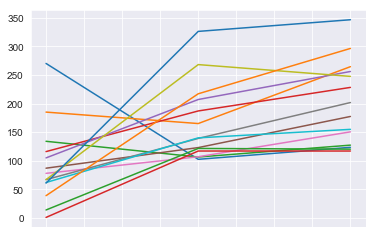

In [52]:
counts = pd.DataFrame(columns=["total", "median", "mean"])
counts['total'] = our_comments.user.value_counts()
counts['median'] = our_comments.groupby("user")["text"].apply(lambda x: median([len(str(y)) for y in x.tolist()]))
counts['mean'] = our_comments.groupby("user")["text"].apply(lambda x: mean([len(str(y)) for y in x.tolist()]))
counts.T.plot(legend=False)
counts.corr(method="spearman")

In [53]:
counts

,total,median,mean
anastasiak,270,102.5,123.462963
michelle_la,185,165.0,264.372973
mawaters,134,106.5,127.283582
aliceLF,116,187.0,228.155172
KariGustafson,105,207.0,255.952381
cypriine,87,123.0,177.379310
carina.albrecht,78,107.0,150.487179
vreichsh,67,139.0,201.701493
Bubblbu,67,268.0,247.402985
CSG,62,140.0,154.870968


In [54]:
reading_times = pd.DataFrame(columns=["url_id", "week", "user", "mins", "comments"])

for user in usernames:
    for uid in comments.url_id.unique():
        c = comments[(comments.user==user)&(comments.url_id==uid)]
        count = len(c)
        if count > 1:
            reading_time = max(c.created)-min(c.updated)
            reading_time = int(reading_time.seconds // 60)
            reading_times.loc[len(reading_times)+1] = [uid, c.week.iloc[0], user, reading_time, count]
reading_times.mins = reading_times.mins.astype(int)
reading_times.comments = reading_times.comments.astype(int)

In [55]:
reading_times.groupby("user")['mins'].median()

user
Bubblbu                28.0
CSG                    40.0
KariGustafson          42.0
aliceLF                66.0
anastasiak             33.0
camilleweinsheimer     35.0
carina.albrecht        83.0
cypriine              341.5
juan                  494.0
mawaters               88.5
melissa_roach          31.0
michelle_la            74.0
vreichsh               20.0
Name: mins, dtype: float64

In [56]:
our_comments['contains_url'] = our_comments.text.map(lambda x: re.search(URL_PATTERN, x) is not None if not pd.isna(x) else None)
our_comments.groupby("user")['contains_url'].sum()

/home/asura/.virtualenvs/altmetrics/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


user
Bubblbu                 18
CSG                      0
KariGustafson            7
aliceLF                 35
anastasiak               0
camilleweinsheimer       0
carina.albrecht          9
cypriine                 3
juan                     2
kprosser              True
mawaters                 3
melissa_roach            5
michelle_la             21
vreichsh                 2
Name: contains_url, dtype: object